TASK 1

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("estat_sdg_08_10_en.csv")

In [92]:
print(df.head())

print(df.info())

print(df.describe())

print(df.describe(include=['object']))

               DATAFLOW        LAST UPDATE    freq  \
0  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00       ?   
1  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
2  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
3  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
4  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   

                                           unit  \
0  Chain linked volumes (2020), euro per capita   
1  Chain linked volumes (2020), euro per capita   
2  Chain linked volumes (2020), euro per capita   
3  Chain linked volumes (2020), euro per capita   
4  Chain linked volumes (2020), euro per capita   

                                   na_item      geo TIME_PERIOD OBS_VALUE  \
0  Gross domestic product at market prices  Albania        2019      4850   
1  Gross domestic product at market prices  Albania        2020      4710   
2  Gross domestic product at market prices  Albania        2021      5190   
3  Gross domestic product at market prices  Albania        2

In [93]:
print(df.isnull().sum())

DATAFLOW          0
LAST UPDATE       0
freq              0
unit              0
na_item           0
geo               0
TIME_PERIOD       0
OBS_VALUE         0
OBS_FLAG       1664
CONF_STATUS    1791
dtype: int64


In [94]:
df.interpolate(inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\olive\AppData\Local\Temp\ipykernel_56260\3969881392.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)
C:\Users\olive\AppData\Local\Temp\ipykernel_56260\3969881392.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [95]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)

In [96]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, col)

In [97]:
print(df.dtypes)

DATAFLOW       object
LAST UPDATE    object
freq           object
unit           object
na_item        object
geo            object
TIME_PERIOD    object
OBS_VALUE      object
OBS_FLAG       object
dtype: object


In [98]:
df["OBS_VALUE"] = pd.to_numeric(df["OBS_VALUE"], errors="coerce")

In [99]:
print(df.dtypes)

DATAFLOW        object
LAST UPDATE     object
freq            object
unit            object
na_item         object
geo             object
TIME_PERIOD     object
OBS_VALUE      float64
OBS_FLAG        object
dtype: object


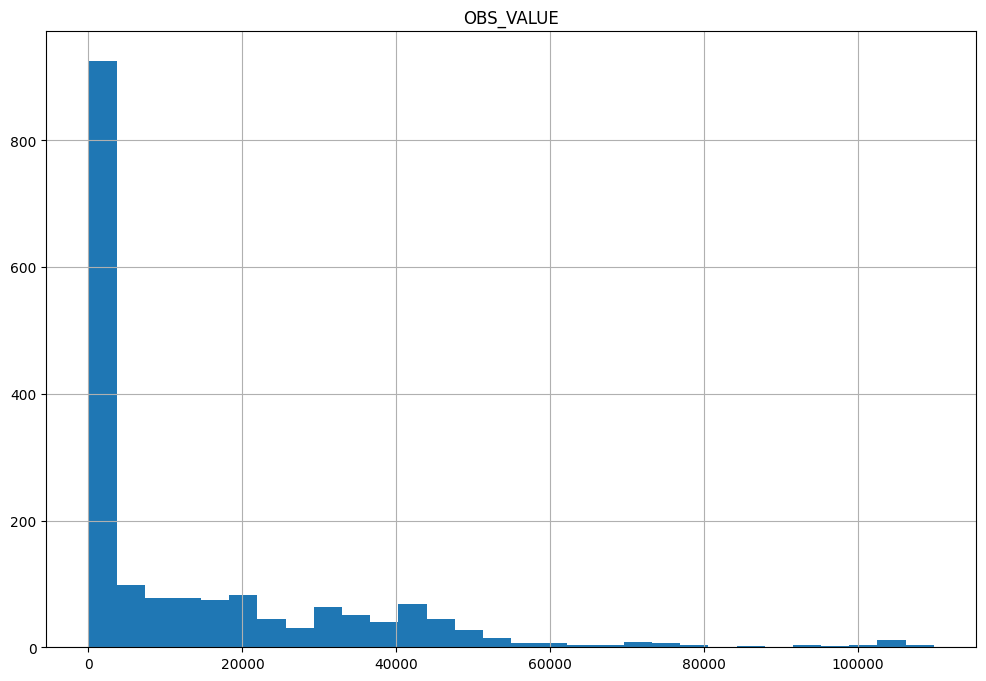

In [100]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

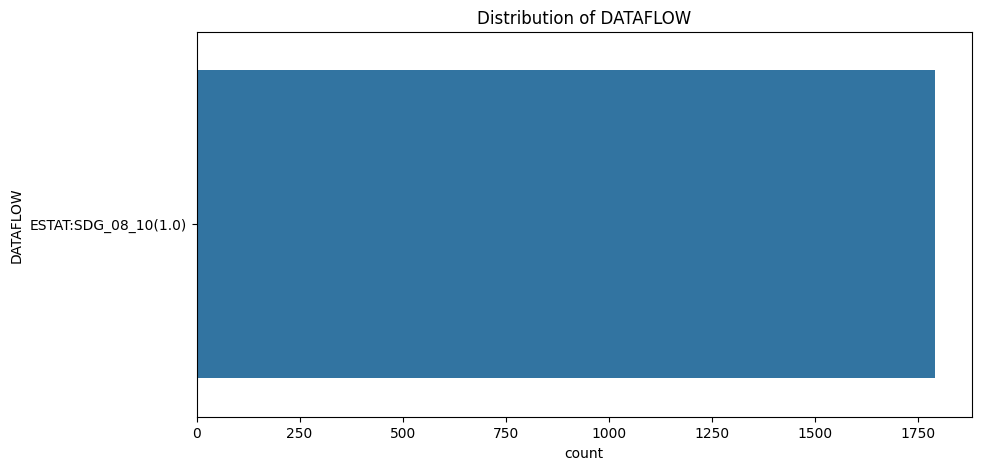

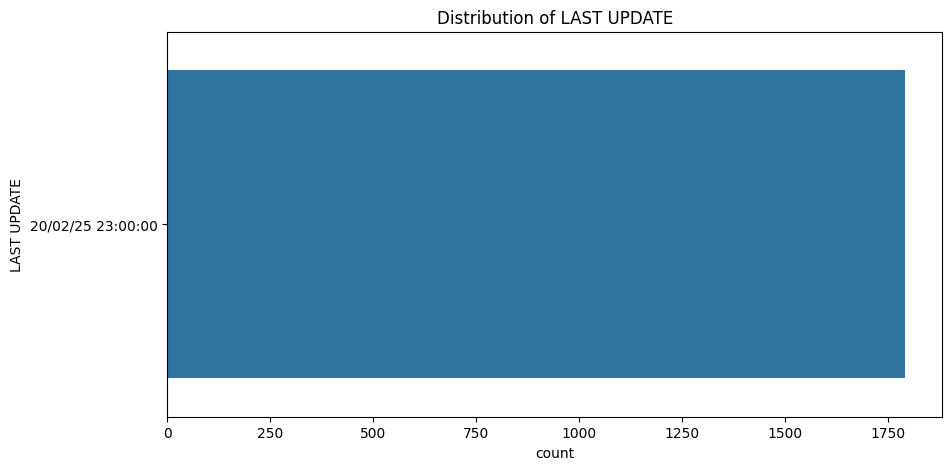

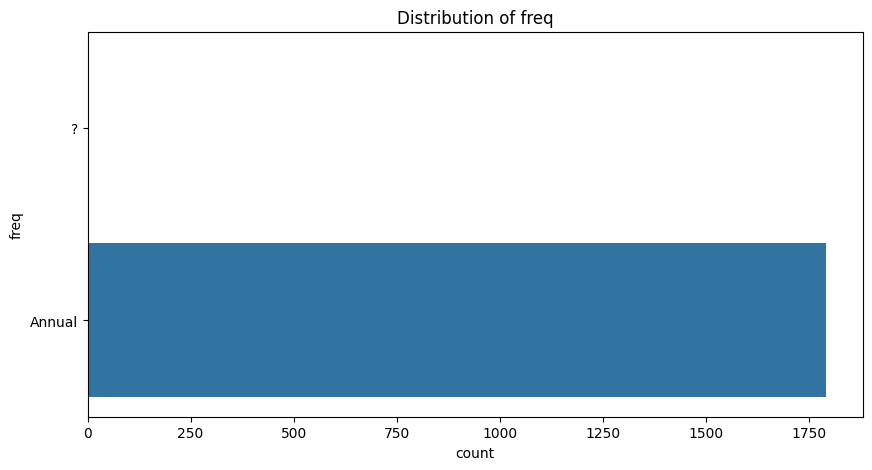

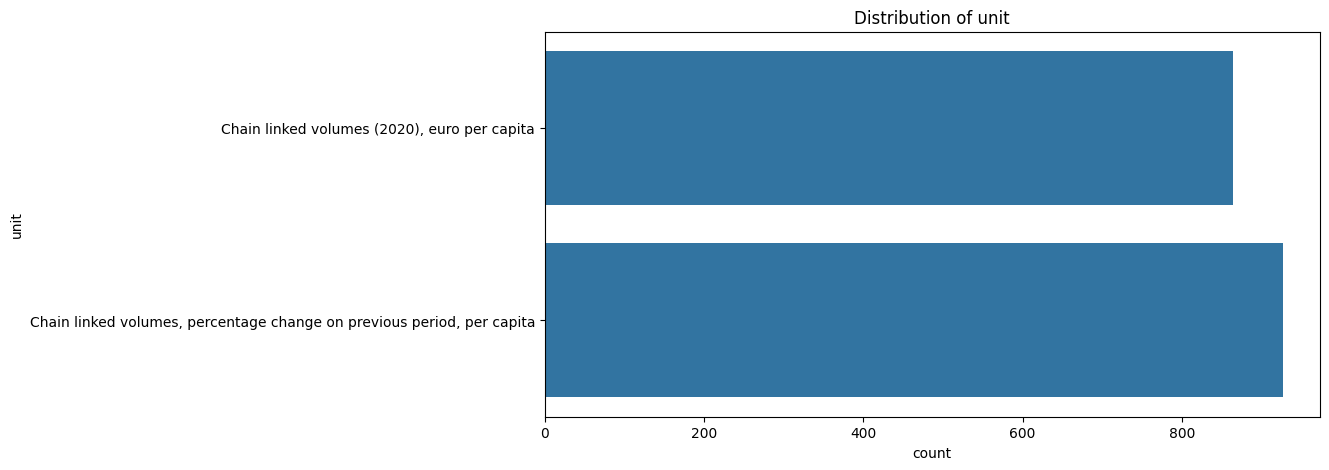

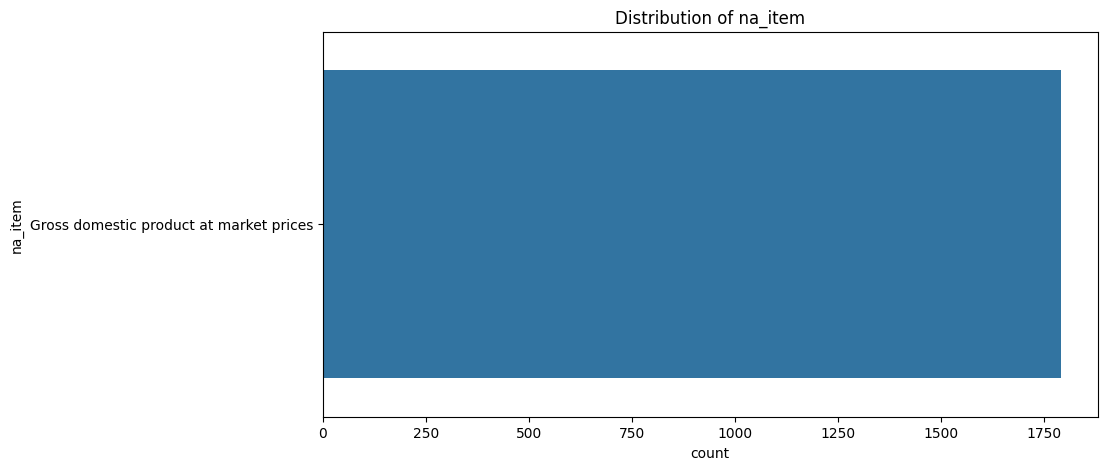

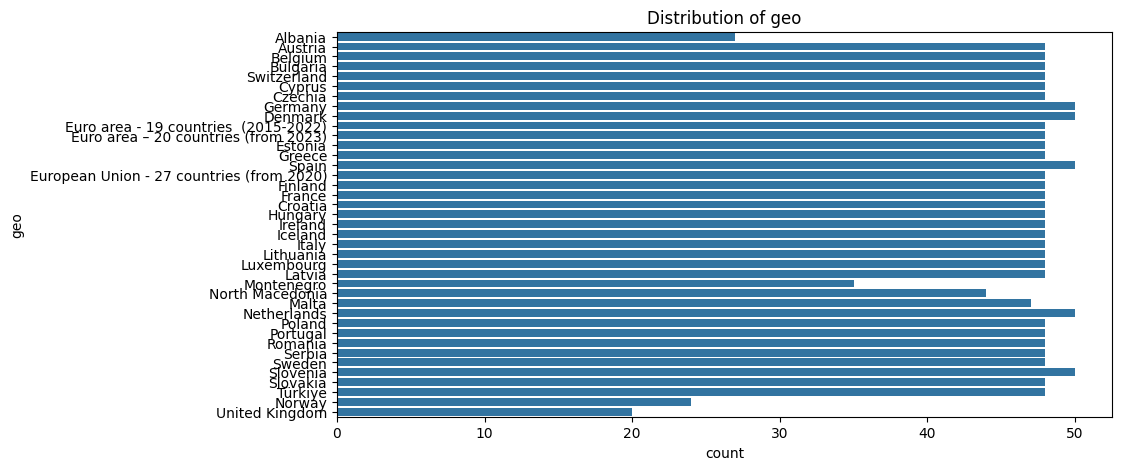

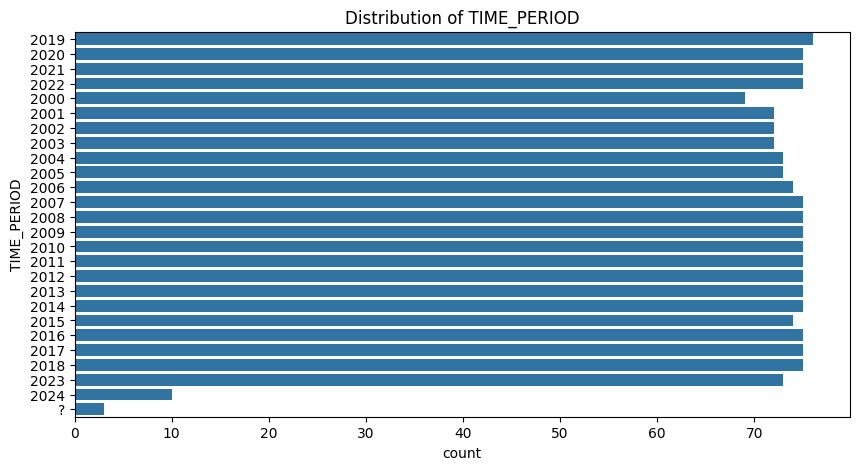

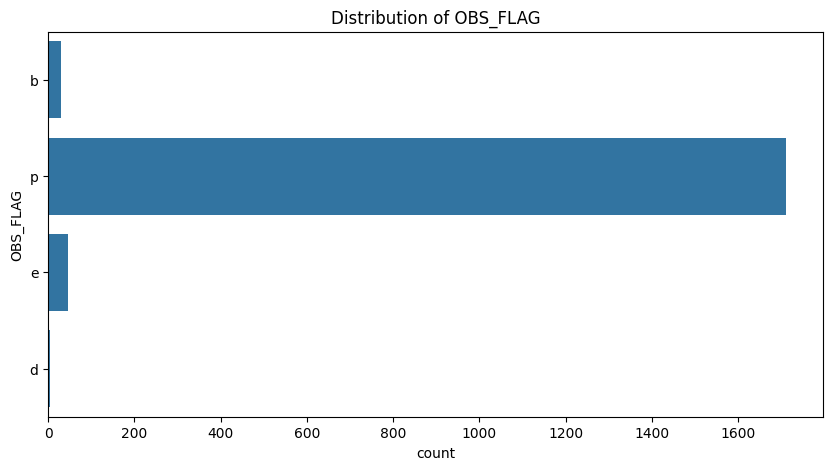

In [101]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

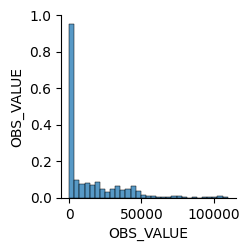

In [102]:
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

TASK 2

In [103]:
bins = [df["OBS_VALUE"].min(), df["OBS_VALUE"].quantile(0.33), df["OBS_VALUE"].quantile(0.66), df["OBS_VALUE"].max()]
labels = ["Low", "Medium", "High"]

df["OBS_VALUE_Binned"] = pd.cut(df["OBS_VALUE"], bins=bins, labels=labels, include_lowest=True)

print(df[["OBS_VALUE", "OBS_VALUE_Binned"]].head())

   OBS_VALUE OBS_VALUE_Binned
0     4850.0           Medium
1     4710.0           Medium
2     5190.0           Medium
3     5500.0           Medium
4    37880.0             High


In [104]:
df_encoded = pd.get_dummies(df, columns=["geo"], prefix="geo")

print(df_encoded.head())

               DATAFLOW        LAST UPDATE    freq  \
0  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00       ?   
1  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
2  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
3  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   
4  ESTAT:SDG_08_10(1.0)  20/02/25 23:00:00  Annual   

                                           unit  \
0  Chain linked volumes (2020), euro per capita   
1  Chain linked volumes (2020), euro per capita   
2  Chain linked volumes (2020), euro per capita   
3  Chain linked volumes (2020), euro per capita   
4  Chain linked volumes (2020), euro per capita   

                                   na_item TIME_PERIOD  OBS_VALUE OBS_FLAG  \
0  Gross domestic product at market prices        2019     4850.0        b   
1  Gross domestic product at market prices        2020     4710.0        p   
2  Gross domestic product at market prices        2021     5190.0        p   
3  Gross domestic product at market prices        2022  

In [105]:
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Standard Deviation:\n", df.std(numeric_only=True))

Mean:
 OBS_VALUE    13788.663881
dtype: float64
Median:
 OBS_VALUE    8.8
dtype: float64
Standard Deviation:
 OBS_VALUE    20365.76075
dtype: float64


In [106]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nCategory Counts for {col}:\n", df[col].value_counts())


Category Counts for DATAFLOW:
 DATAFLOW
ESTAT:SDG_08_10(1.0)    1791
Name: count, dtype: int64

Category Counts for LAST UPDATE:
 LAST UPDATE
20/02/25 23:00:00    1791
Name: count, dtype: int64

Category Counts for freq:
 freq
Annual    1790
?            1
Name: count, dtype: int64

Category Counts for unit:
 unit
Chain linked volumes, percentage change on previous period, per capita    927
Chain linked volumes (2020), euro per capita                              864
Name: count, dtype: int64

Category Counts for na_item:
 na_item
Gross domestic product at market prices    1791
Name: count, dtype: int64

Category Counts for geo:
 geo
Slovenia                                     50
Spain                                        50
Germany                                      50
Denmark                                      50
Netherlands                                  50
Ireland                                      48
Latvia                                       48
Iceland              

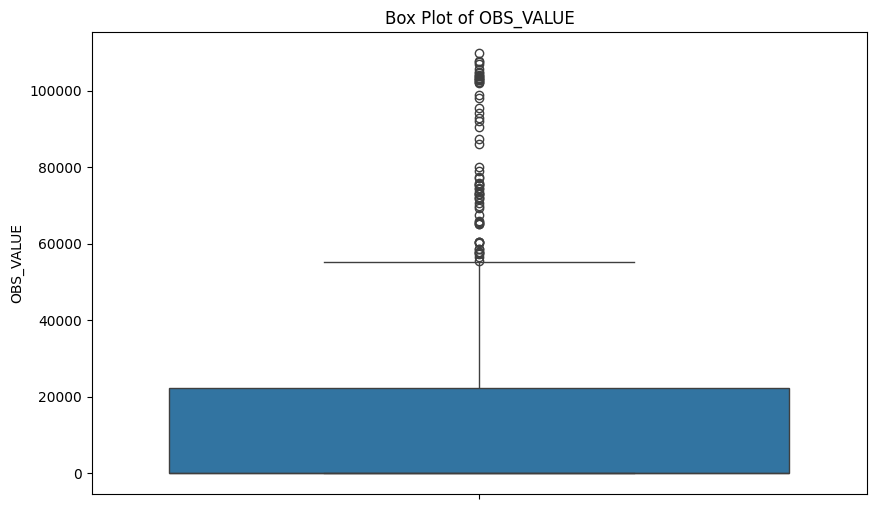

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["OBS_VALUE"])
plt.title("Box Plot of OBS_VALUE")
plt.show()

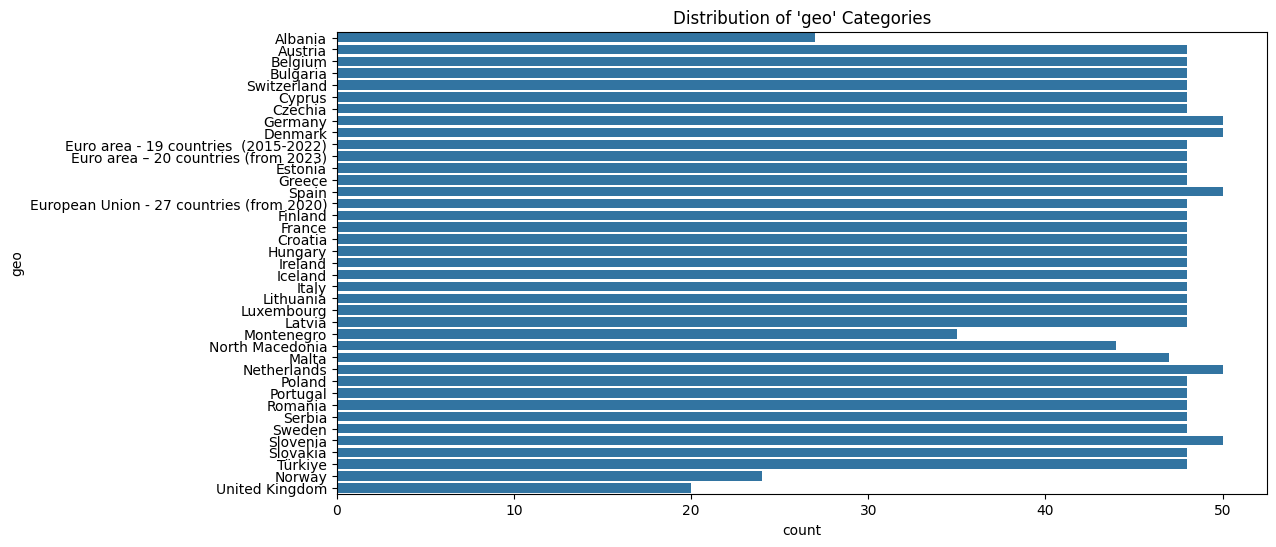

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["geo"])
plt.title("Distribution of 'geo' Categories")
plt.show()

TASK 3

In [109]:
df_selected = df[["geo", "TIME_PERIOD", "OBS_VALUE"]]
print(df_selected.head())

       geo TIME_PERIOD  OBS_VALUE
0  Albania        2019     4850.0
1  Albania        2020     4710.0
2  Albania        2021     5190.0
3  Albania        2022     5500.0
4  Austria        2000    37880.0


In [110]:
df_grouped = df_selected.groupby("geo")["OBS_VALUE"].mean().reset_index()
print(df_grouped.head())

        geo     OBS_VALUE
0   Albania    753.966667
1   Austria  20775.574468
2   Belgium  19812.008333
3  Bulgaria   3669.897872
4   Croatia   5955.431250


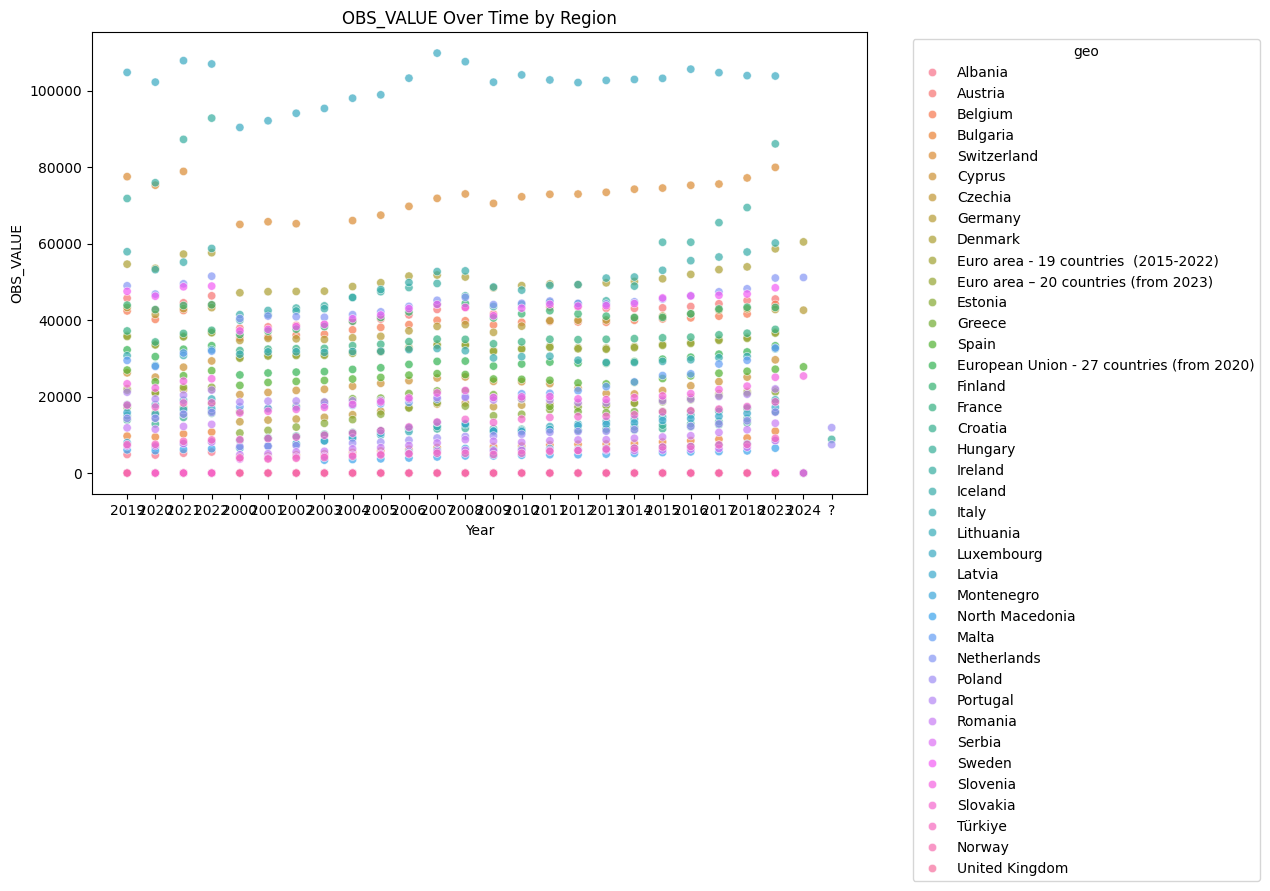

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["TIME_PERIOD"], y=df["OBS_VALUE"], hue=df["geo"], alpha=0.7)
plt.title("OBS_VALUE Over Time by Region")
plt.xlabel("Year")
plt.ylabel("OBS_VALUE")
plt.legend(title="geo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

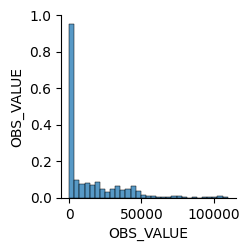

In [112]:
sns.pairplot(df[["TIME_PERIOD", "OBS_VALUE"]])
plt.show()